In [3]:
filenames = []
distances = []
with open("../run_all_lgradb.log") as f:
  while line := f.readline():
    line = line.rstrip()
    if line.startswith("result="):
      distances.append(float(line.removeprefix("result=")))
    elif line.endswith(".json"):
      filenames.append(line)

assert len(filenames)>0
assert len(filenames) == len(distances)


serial0018874.json


Authorization required, but no authorization protocol specified

Authorization required, but no authorization protocol specified

Authorization required, but no authorization protocol specified



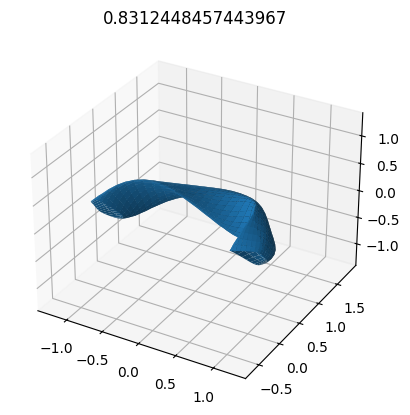

serial0019047.json


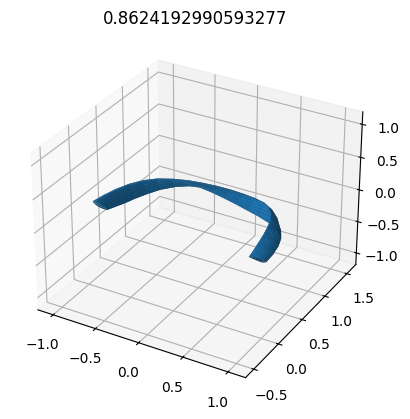

serial0019098.json


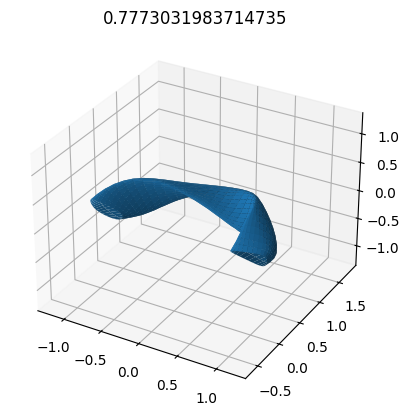

serial0019104.json


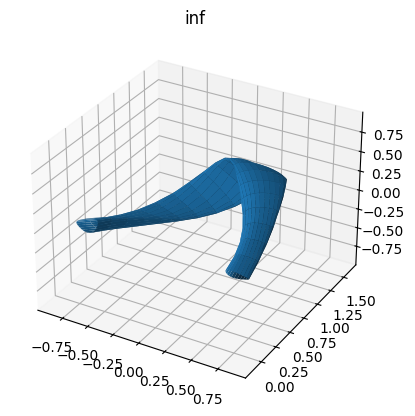

serial0019112.json


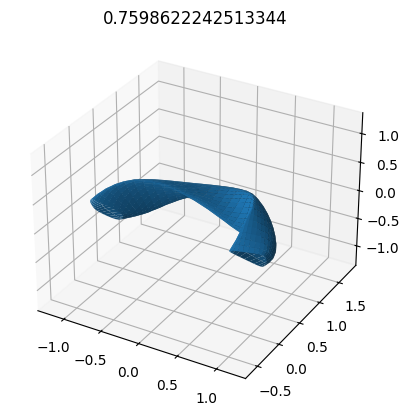

serial0019152.json


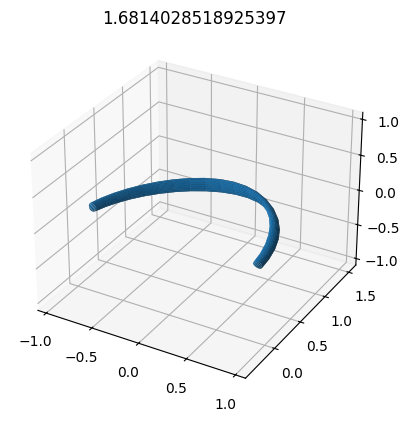

serial0019266.json


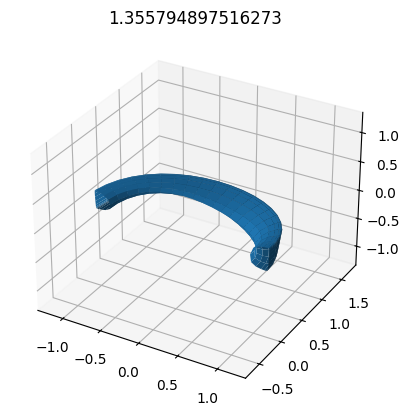

serial0019267.json


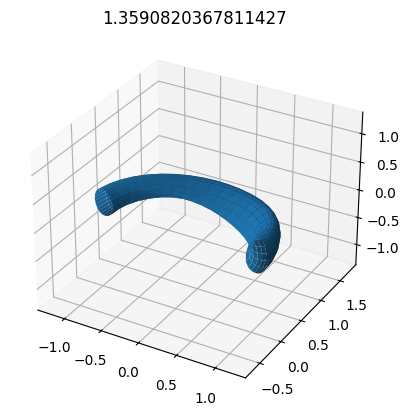

serial0019371.json


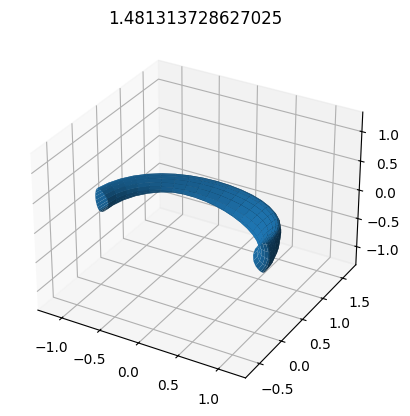

serial0019377.json


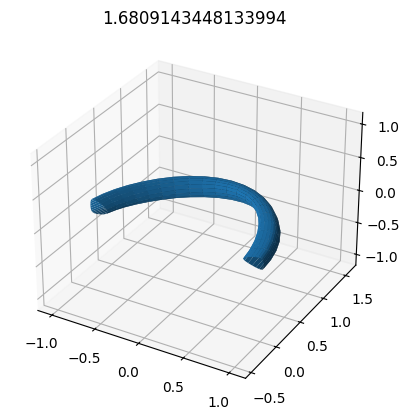

serial0019379.json


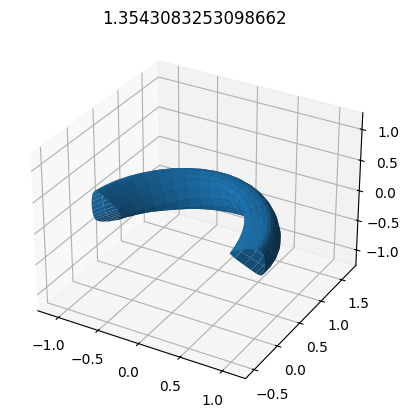

serial0019384.json


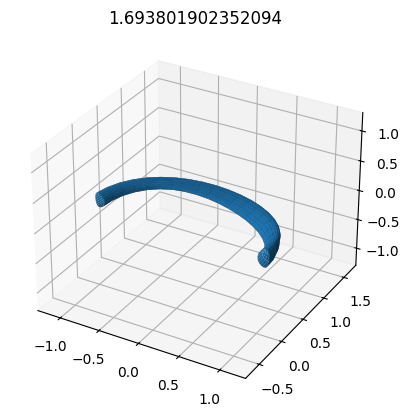

serial0030620.json


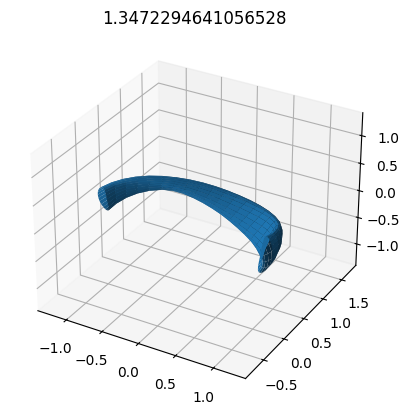

serial0030661.json


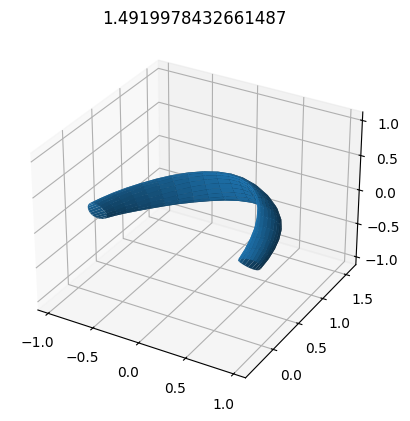

serial0030664.json


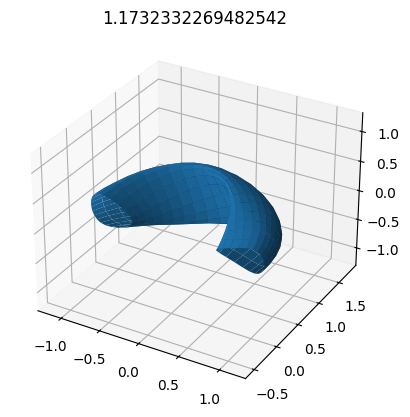

serial0030812.json


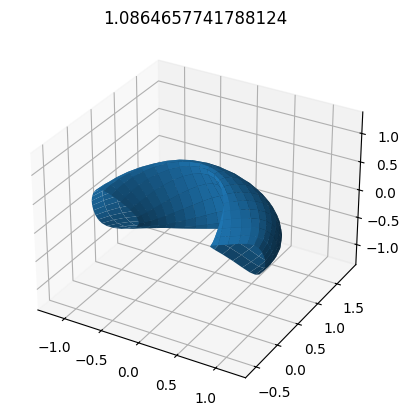

serial0050638.json


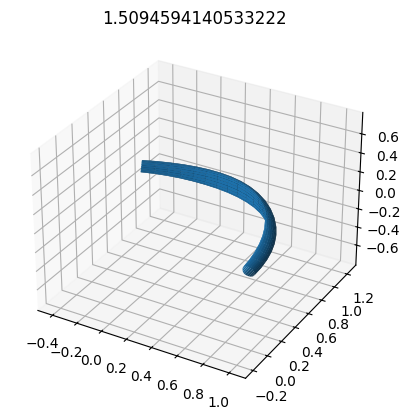

serial0050646.json


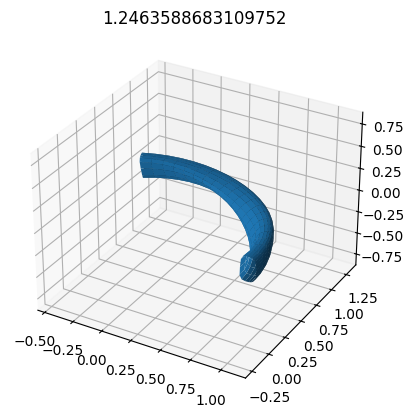

serial0050695.json


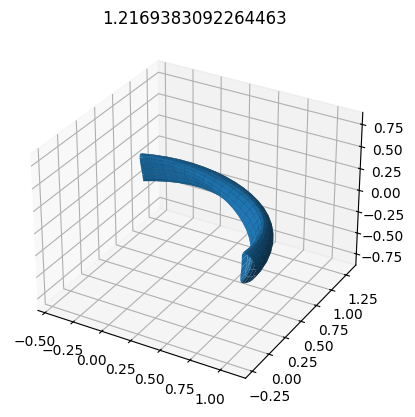

serial0070800.json


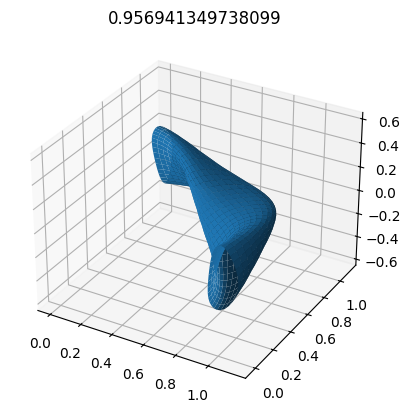

serial0070807.json


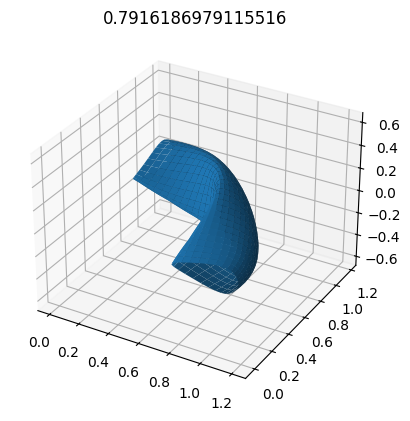

serial0070821.json


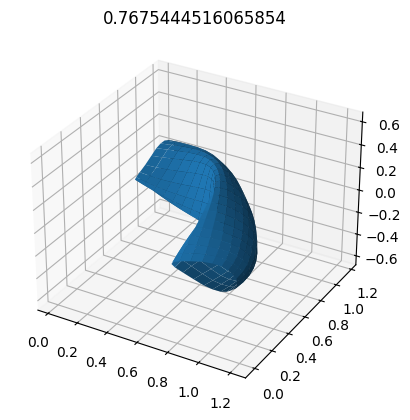

serial0070828.json


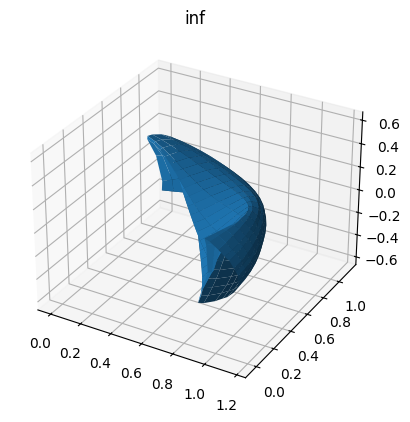

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import simsopt 

for file, dist in zip(filenames, distances):
    print(file)
    path = os.path.join("db", file)
    surfs, coils = simsopt.load(path)
    surfs[-1].plot(close=True, show=False)
    plt.title(str(dist))
    plt.show()


<Axes: >

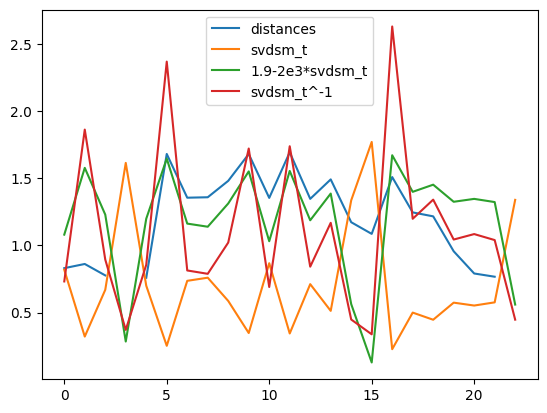

In [11]:
import pandas as pd
import numpy as np

# Magic numbers are extracted from the run_all_lgradb.log file, generated by python -m replicate_lgradb.run_all | tee run_all_lgradb.log
svdsm_t = np.array(
    [
        0.0004095769369517772,
        0.00016105644599163628,
        0.0003350306232773115,
        0.0008073935971429215,
        0.0003502506344344876,
        0.00012664159462174673,
        0.0003684966841386521,
        0.00038013908883471794,
        0.00029357951638230473,
        0.00017421592914852114,
        0.0004340937467780372,
        0.0001725356250141974,
        0.00035613852343905754,
        0.0002567007944463027,
        0.0006681978509264176,
        0.0008854294216594975,
        0.00011404928081536859,
        0.0002502557453870066,
        0.00022364243437134488,
        0.00028726203475460847,
        0.0002764918076678114,
        0.0002883502388013146,
        0.0006698672841292481,
    ]
)
corrdf = pd.DataFrame(
    zip(filenames, distances, 2e3 *svdsm_t, 1.9 - 2e3 * svdsm_t, 3e-4/svdsm_t),
    columns=["filenames", "distances", "svdsm_t","1.9-2e3*svdsm_t","svdsm_t^-1"],
)
corrdf.plot()


,distances,svdsm_t,1.9-2e3*svdsm_t,svdsm_t^-1
distances,1.000000,-0.279084,0.279084,0.447679
svdsm_t,-0.279084,1.000000,-1.000000,-0.817558
1.9-2e3*svdsm_t,0.279084,-1.000000,1.000000,0.817558
svdsm_t^-1,0.447679,-0.817558,0.817558,1.000000


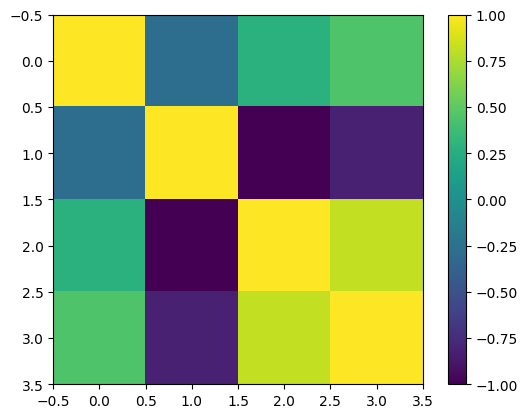

In [21]:
plt.imshow(corrdf.select_dtypes(include="number").corr())
plt.colorbar()
corrdf.select_dtypes(include="number").corr()
